# 線形代数：基底と基底変換 (2.6.1 Generating Set and Basis, 2.7.2 Basis Change)

このノートブックでは、**基底（basis）**と**基底変換（basis change）**について基礎から学びます。

**「データの見る角度を変える」**という概念です。データをより扱いやすい形（座標系）で見直すために使われます。

## 目次
1. [基底とは](#基底とは)
2. [生成集合と基底](#生成集合と基底)
3. [標準基底](#標準基底)
4. [基底変換とは](#基底変換とは)
5. [基底変換の可視化](#基底変換の可視化)
6. [基底変換行列](#基底変換行列)
7. [主成分分析（PCA）への応用](#主成分分析pcaへの応用)
8. [実装例](#実装例)


---

## 必要なライブラリのインポート


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Polygon
import seaborn as sns
import matplotlib.font_manager as fm

# 日本語フォントの設定
try:
    jp_fonts = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Yu Gothic',
                'Noto Sans CJK JP', 'AppleGothic', 'Arial Unicode MS']
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    font_found = False
    for font_name in jp_fonts:
        if font_name in available_fonts:
            plt.rcParams['font.family'] = font_name
            font_found = True
            print(f"Using font: {font_name}")
            break

    if not font_found:
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN',
                                            'Yu Gothic', 'Meiryo', 'MS Gothic', 'DejaVu Sans']
        print("Using fallback font configuration")
except Exception as e:
    print(f"Font configuration warning: {e}")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


Using font: Hiragino Sans


---

## 基底とは

**基底（basis）**は、ベクトル空間を「構成する最小限のベクトルの集合」です。

### 数学的な定義

ベクトル空間 $V$ の基底 $\mathcal{B} = \{\mathbf{b}_1, \mathbf{b}_2, \ldots, \mathbf{b}_n\}$ は以下の2つの性質を満たします：

1. **線形独立性（Linear Independence）**: 
   $$\alpha_1 \mathbf{b}_1 + \alpha_2 \mathbf{b}_2 + \cdots + \alpha_n \mathbf{b}_n = \mathbf{0}$$
   が成り立つのは、$\alpha_1 = \alpha_2 = \cdots = \alpha_n = 0$ のときのみ

2. **生成性（Spanning）**: 
   任意のベクトル $\mathbf{v} \in V$ は、基底ベクトルの線形結合として一意に表せる：
   $$\mathbf{v} = c_1 \mathbf{b}_1 + c_2 \mathbf{b}_2 + \cdots + c_n \mathbf{b}_n$$

### なぜ基底が重要なのか？

- **座標系の定義**: 基底は「座標軸」を定義します
- **データの表現**: 同じデータでも、異なる基底で見ると異なる「見え方」になります
- **次元削減**: 重要な基底だけを選ぶことで、データの本質的な特徴を抽出できます


---

## 生成集合と基底

### 生成集合（Generating Set / Spanning Set）

ベクトルの集合 $S = \{\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_k\}$ がベクトル空間 $V$ を**生成する**とは、
$V$ の任意のベクトルが $S$ のベクトルの線形結合として表せることを意味します。

$$\text{span}(S) = \left\{ \sum_{i=1}^{k} \alpha_i \mathbf{v}_i \mid \alpha_i \in \mathbb{R} \right\} = V$$

### 基底（Basis）

基底は、**線形独立**かつ**生成する**ベクトルの集合です。

- 生成集合は「多すぎる」可能性がある（冗長なベクトルを含む）
- 基底は「最小限の」生成集合（冗長性がない）


In [ ]:
# 生成集合と基底の例

# 例1: 標準基底（2次元）
standard_basis = np.array([
    [1, 0],  # e1
    [0, 1]   # e2
])

print("標準基底（2次元）:")
print(standard_basis)
print(f"\n線形独立性の確認:")
print(f"行列のランク: {np.linalg.matrix_rank(standard_basis)}")
print(f"基底ベクトルの数: {len(standard_basis)}") # row
# Linear Independence
print(f"→ 線形独立: {np.linalg.matrix_rank(standard_basis) == len(standard_basis)}")

# 例2: 別の基底（2次元）
another_basis = np.array([
    [1, 1],   # b1
    [-1, 1]   # b2
])

print("\n別の基底:")
print(another_basis)
print(f"\n線形独立性の確認:")
print(f"行列のランク: {np.linalg.matrix_rank(another_basis)}")
print(f"基底ベクトルの数: {len(another_basis)}")
print(f"→ 線形独立: {np.linalg.matrix_rank(another_basis) == len(another_basis)}")

# 例3: 生成集合だが基底ではない（冗長）
spanning_set = np.array([
    [1, 0],   # e1
    [0, 1],   # e2
    [1, 1]    # e1 + e2（冗長）
])

print("\n生成集合（冗長）:")
print(spanning_set)
print(f"\n線形独立性の確認:")
print(f"行列のランク: {np.linalg.matrix_rank(spanning_set)}")
print(f"ベクトルの数: {len(spanning_set)}")
print(f"→ 基底ではない（線形従属）: {np.linalg.matrix_rank(spanning_set) < len(spanning_set)}")


標準基底（2次元）:
[[1 0]
 [0 1]]

線形独立性の確認:
行列のランク: 2
基底ベクトルの数: 2
→ 線形独立: True

別の基底:
[[ 1  1]
 [-1  1]]

線形独立性の確認:
行列のランク: 2
基底ベクトルの数: 2
→ 線形独立: True

生成集合（冗長）:
[[1 0]
 [0 1]
 [1 1]]

線形独立性の確認:
行列のランク: 2
ベクトルの数: 3
→ 基底ではない（線形従属）: True


---

## 標準基底

**標準基底（standard basis）**は、最も基本的な基底です。

### 2次元の場合

$$\mathbf{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad \mathbf{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

### 3次元の場合

$$\mathbf{e}_1 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \quad \mathbf{e}_2 = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \quad \mathbf{e}_3 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$$

標準基底では、ベクトル $\mathbf{v} = [v_1, v_2, \ldots, v_n]^T$ の各成分は、そのまま基底ベクトルへの「係数」になります。


ベクトル v = [3 4]

標準基底での表現:
v = 3 * e1 + 4 * e2
  = 3 * [1 0] + 4 * [0 1]
  = [3 4]


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3652291083.py:42: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3652291083.py:42: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3652291083.py:42: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3652291083.py:42: UserWarning: Glyph 24213 (\N{CJK UNIFIED IDEOGRAPH-5E95}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3652291083.py:42: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel

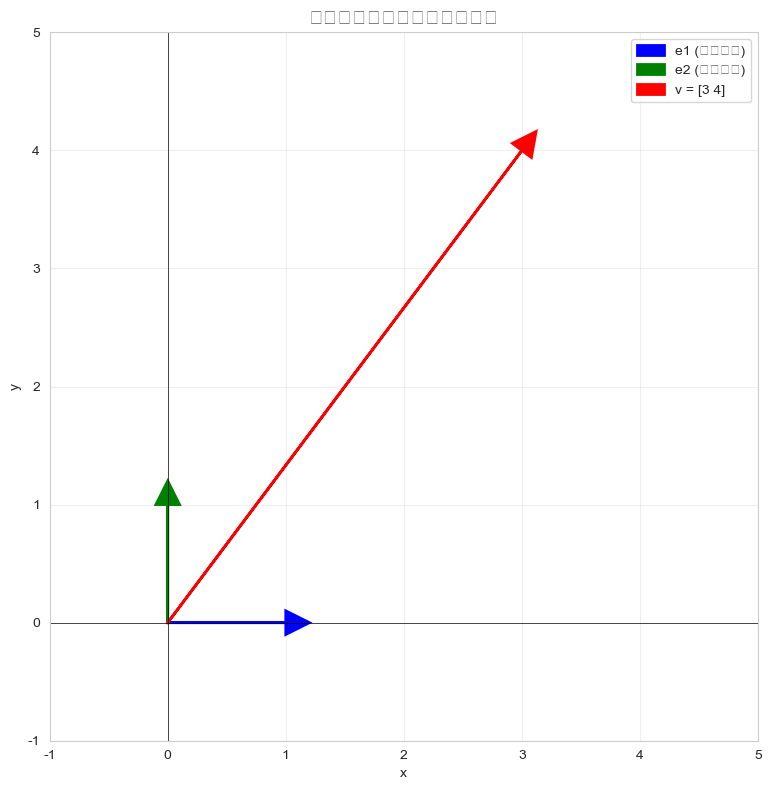

In [13]:
# 標準基底でのベクトルの表現

# 2次元ベクトル
v = np.array([3, 4])

# 標準基底
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# ベクトルvを標準基底で表現
print(f"ベクトル v = {v}")
print(f"\n標準基底での表現:")
print(f"v = {v[0]} * e1 + {v[1]} * e2")
print(f"  = {v[0]} * {e1} + {v[1]} * {e2}")
print(f"  = {v[0]*e1 + v[1]*e2}")

# 可視化
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# 標準基底ベクトル
ax.arrow(0, 0, e1[0], e1[1], head_width=0.2, head_length=0.2,
         fc='blue', ec='blue', linewidth=2, label='e1 (標準基底)')
ax.arrow(0, 0, e2[0], e2[1], head_width=0.2, head_length=0.2,
         fc='green', ec='green', linewidth=2, label='e2 (標準基底)')

# ベクトルv
ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2,
         fc='red', ec='red', linewidth=2, label=f'v = {v}')

# グリッド
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.legend()
ax.set_title('標準基底でのベクトルの表現', fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.tight_layout()
plt.show()


---

## 基底変換とは

**基底変換（basis change）**は、「データの見る角度を変える」操作です。

同じベクトルでも、異なる基底で見ると異なる「座標」で表現されます。

### 数学的な定義

ベクトル $\mathbf{v}$ を：
- 基底 $\mathcal{B}_1 = \{\mathbf{b}_1, \mathbf{b}_2, \ldots, \mathbf{b}_n\}$ で表現した座標: $\mathbf{c}_1$
- 基底 $\mathcal{B}_2 = \{\mathbf{b}'_1, \mathbf{b}'_2, \ldots, \mathbf{b}'_n\}$ で表現した座標: $\mathbf{c}_2$

とすると、基底変換行列 $P$ を使って：
$$\mathbf{c}_2 = P^{-1} \mathbf{c}_1$$

と変換できます。

### なぜ基底変換が重要なのか？

- **データの可視化**: データをより見やすい方向から観察できる
- **次元削減**: 重要な方向（基底）だけを選んで、データの本質を抽出
- **特徴抽出**: 機械学習で重要な特徴を自動的に見つける


In [14]:
# 基底変換の例

# 元のベクトル（標準基底での座標）
v_standard = np.array([3, 4])

# 標準基底
B_standard = np.array([
    [1, 0],
    [0, 1]
])

# 新しい基底（45度回転した基底）
theta = np.pi / 4  # 45度
B_new = np.array([
    [np.cos(theta), -np.sin(theta)],   # b1'
    [np.sin(theta), np.cos(theta)]      # b2'
])

print("標準基底:")
print(B_standard)
print(f"\n新しい基底（45度回転）:")
print(B_new)

# 基底変換行列: 新しい基底を標準基底で表現した行列
# 新しい基底での座標を標準基底での座標に変換する行列
P = B_new.T  # 各基底ベクトルを列ベクトルとして並べた行列

print(f"\n基底変換行列 P (新しい基底→標準基底):")
print(P)

# 標準基底での座標を新しい基底での座標に変換
v_new = np.linalg.inv(P) @ v_standard

print(f"\nベクトル v の座標:")
print(f"標準基底での座標: {v_standard}")
print(f"新しい基底での座標: {v_new}")

# 検証: 新しい基底での座標を使って標準基底でのベクトルを再構成
v_reconstructed = P @ v_new
print(f"\n再構成されたベクトル（標準基底）: {v_reconstructed}")
print(f"元のベクトルとの差: {np.linalg.norm(v_standard - v_reconstructed)}")


標準基底:
[[1 0]
 [0 1]]

新しい基底（45度回転）:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

基底変換行列 P (新しい基底→標準基底):
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

ベクトル v の座標:
標準基底での座標: [3 4]
新しい基底での座標: [-0.70710678  4.94974747]

再構成されたベクトル（標準基底）: [3. 4.]
元のベクトルとの差: 0.0


---

## 基底変換の可視化

同じベクトルを異なる基底で見ると、異なる「座標」で表現されます。


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 24213 (\N{CJK UNIFIED IDEOGRAPH-5E95}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel

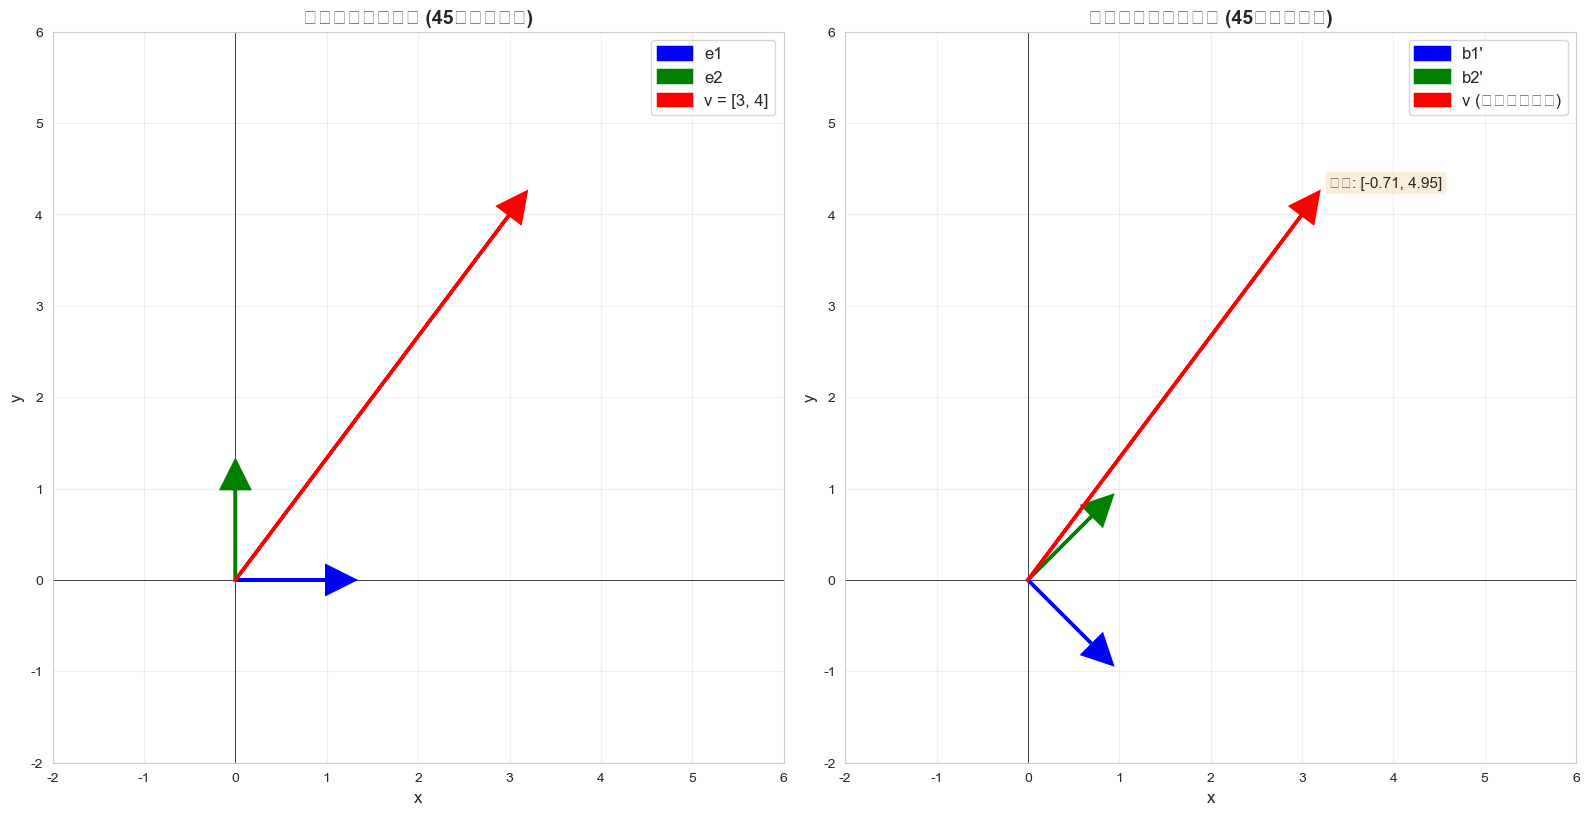


標準基底での座標: [3 4]
45度回転基底での座標: [-0.70710678  4.94974747]


In [15]:
# 基底変換の可視化

def plot_basis_transformation(v_standard, B_standard, B_new, title_suffix=""):
    """基底変換を可視化"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # 左: 標準基底
    ax1 = axes[0]
    # 標準基底ベクトル
    ax1.arrow(0, 0, B_standard[0, 0], B_standard[0, 1],
              head_width=0.3, head_length=0.3, fc='blue', ec='blue',
              linewidth=2.5, label='e1', zorder=3)
    ax1.arrow(0, 0, B_standard[1, 0], B_standard[1, 1],
              head_width=0.3, head_length=0.3, fc='green', ec='green',
              linewidth=2.5, label='e2', zorder=3)
    # ベクトルv
    ax1.arrow(0, 0, v_standard[0], v_standard[1],
              head_width=0.3, head_length=0.3, fc='red', ec='red',
              linewidth=2.5, label=f'v = [{v_standard[0]}, {v_standard[1]}]', zorder=3)

    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-2, 6)
    ax1.set_ylim(-2, 6)
    ax1.set_aspect('equal')
    ax1.axhline(y=0, color='k', linewidth=0.5)
    ax1.axvline(x=0, color='k', linewidth=0.5)
    ax1.legend(fontsize=12)
    ax1.set_title(f'標準基底での表現{title_suffix}', fontsize=14, fontweight='bold')
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)

    # 右: 新しい基底
    ax2 = axes[1]
    P = B_new.T
    v_new = np.linalg.inv(P) @ v_standard

    # 新しい基底ベクトル
    ax2.arrow(0, 0, B_new[0, 0], B_new[0, 1],
              head_width=0.3, head_length=0.3, fc='blue', ec='blue',
              linewidth=2.5, label='b1\'', zorder=3)
    ax2.arrow(0, 0, B_new[1, 0], B_new[1, 1],
              head_width=0.3, head_length=0.3, fc='green', ec='green',
              linewidth=2.5, label='b2\'', zorder=3)
    # ベクトルv（同じ物理的なベクトル）
    ax2.arrow(0, 0, v_standard[0], v_standard[1],
              head_width=0.3, head_length=0.3, fc='red', ec='red',
              linewidth=2.5, label=f'v (同じベクトル)', zorder=3)
    # 新しい基底での座標を表示
    ax2.text(v_standard[0] + 0.3, v_standard[1] + 0.3,
             f'座標: [{v_new[0]:.2f}, {v_new[1]:.2f}]',
             fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(-2, 6)
    ax2.set_ylim(-2, 6)
    ax2.set_aspect('equal')
    ax2.axhline(y=0, color='k', linewidth=0.5)
    ax2.axvline(x=0, color='k', linewidth=0.5)
    ax2.legend(fontsize=12)
    ax2.set_title(f'新しい基底での表現{title_suffix}', fontsize=14, fontweight='bold')
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('y', fontsize=12)

    plt.tight_layout()
    plt.show()

    return v_new

# 例1: 45度回転した基底
v = np.array([3, 4])
B_std = np.array([[1, 0], [0, 1]])
theta = np.pi / 4
B_rot = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

v_new_coords = plot_basis_transformation(v, B_std, B_rot, " (45度回転基底)")
print(f"\n標準基底での座標: {v}")
print(f"45度回転基底での座標: {v_new_coords}")


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 24213 (\N{CJK UNIFIED IDEOGRAPH-5E95}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/3526627039.py:64: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel

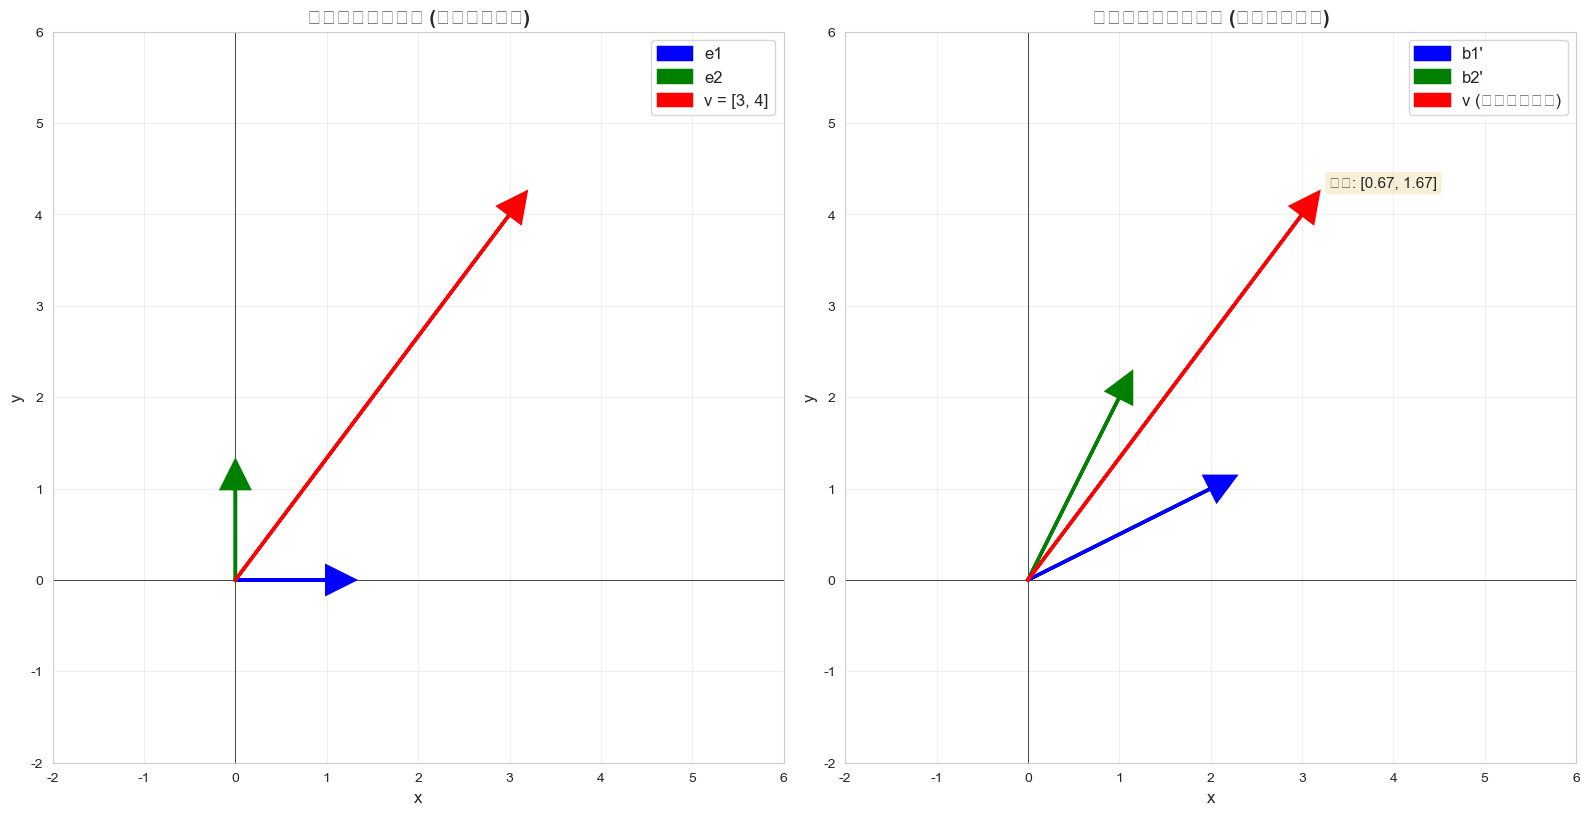


標準基底での座標: [3 4]
カスタム基底での座標: [0.66666667 1.66666667]

再構成されたベクトル: [3. 4.]
元のベクトル: [3 4]
誤差: 0.0


In [16]:
# 例2: 異なる基底での表現

# 新しい基底（スケールと回転を組み合わせた基底）
B_custom = np.array([
    [2, 1],   # b1'
    [1, 2]    # b2'
])

v_new_coords2 = plot_basis_transformation(v, B_std, B_custom, " (カスタム基底)")
print(f"\n標準基底での座標: {v}")
print(f"カスタム基底での座標: {v_new_coords2}")

# 検証
P = B_custom.T
v_reconstructed = P @ v_new_coords2
print(f"\n再構成されたベクトル: {v_reconstructed}")
print(f"元のベクトル: {v}")
print(f"誤差: {np.linalg.norm(v - v_reconstructed)}")


---

## 基底変換行列

基底変換を行うには、**基底変換行列（change of basis matrix）**を使います。

### 定義

基底 $\mathcal{B}_1$ から基底 $\mathcal{B}_2$ への変換行列 $P$ は：
- 新しい基底 $\mathcal{B}_2$ の各ベクトルを、古い基底 $\mathcal{B}_1$ で表現した列ベクトルを並べた行列

### 変換の公式

ベクトル $\mathbf{v}$ が：
- 基底 $\mathcal{B}_1$ での座標: $\mathbf{c}_1$
- 基底 $\mathcal{B}_2$ での座標: $\mathbf{c}_2$

とすると：
$$\mathbf{c}_1 = P \mathbf{c}_2$$
$$\mathbf{c}_2 = P^{-1} \mathbf{c}_1$$


In [17]:
# 基底変換行列の計算と使用

def change_basis(v_coords_old, B_old, B_new):
    """
    基底変換を実行

    Parameters:
    -----------
    v_coords_old : array
        古い基底での座標
    B_old : array
        古い基底（各行が基底ベクトル）
    B_new : array
        新しい基底（各行が基底ベクトル）

    Returns:
    --------
    v_coords_new : array
        新しい基底での座標
    P : array
        基底変換行列（新しい基底→古い基底）
    """
    # 基底変換行列: 新しい基底を古い基底で表現
    P = B_new.T  # 各基底ベクトルを列ベクトルとして並べる

    # 座標変換: 新しい基底での座標を計算
    v_coords_new = np.linalg.inv(P) @ v_coords_old

    return v_coords_new, P

# 例
B_standard = np.array([[1, 0], [0, 1]])
B_new = np.array([[1, 1], [-1, 1]])

v_standard_coords = np.array([3, 4])

v_new_coords, P = change_basis(v_standard_coords, B_standard, B_new)

print("基底変換の例:")
print(f"標準基底: {B_standard}")
print(f"新しい基底: {B_new}")
print(f"\nベクトルの座標:")
print(f"標準基底での座標: {v_standard_coords}")
print(f"新しい基底での座標: {v_new_coords}")
print(f"\n基底変換行列 P:")
print(P)
print(f"\n検証: P @ v_new_coords = {P @ v_new_coords}")
print(f"元の座標: {v_standard_coords}")


基底変換の例:
標準基底: [[1 0]
 [0 1]]
新しい基底: [[ 1  1]
 [-1  1]]

ベクトルの座標:
標準基底での座標: [3 4]
新しい基底での座標: [3.5 0.5]

基底変換行列 P:
[[ 1 -1]
 [ 1  1]]

検証: P @ v_new_coords = [3. 4.]
元の座標: [3 4]


---

## 主成分分析（PCA）への応用

**主成分分析（Principal Component Analysis, PCA）**は、基底変換の典型的な応用例です。

### PCAの考え方

1. **データの分散が大きい方向**を見つける（第1主成分）
2. その方向に直交する方向で、次に分散が大きい方向を見つける（第2主成分）
3. これらの主成分を**新しい基底**として、データを表現し直す

### なぜPCAが基底変換なのか？

- 元のデータは標準基底（各特徴量が軸）で表現されている
- PCAは、データの本質的な特徴を捉える**新しい基底**を見つける
- この新しい基底でデータを見直すことで、次元削減や特徴抽出が可能になる

### 第10章での重要性

第10章で扱うPCAによる次元削減は、まさにこの「基底の変換」を行ってデータの重要な特徴だけを取り出す操作です。


In [18]:
# PCAの簡単な例（基底変換の観点から）

# 2次元データを生成（相関のあるデータ）
np.random.seed(42)
n_samples = 100
mean = [0, 0]
cov = [[3, 2], [2, 3]]  # 相関のある共分散行列
X = np.random.multivariate_normal(mean, cov, n_samples)

# データの中心化
X_centered = X - X.mean(axis=0)

# 共分散行列を計算
cov_matrix = np.cov(X_centered.T)

# 固有値分解（PCAの核心）
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 固有値を大きい順にソート
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("PCAによる基底変換:")
print(f"\n元のデータの共分散行列:")
print(cov_matrix)
print(f"\n主成分（新しい基底）:")
print(f"第1主成分: {eigenvectors[:, 0]} (分散: {eigenvalues[0]:.2f})")
print(f"第2主成分: {eigenvectors[:, 1]} (分散: {eigenvalues[1]:.2f})")

# データを新しい基底（主成分）で表現
P_pca = eigenvectors  # 基底変換行列（主成分を列ベクトルとして並べる）
X_pca = X_centered @ P_pca

print(f"\nデータの変換:")
print(f"元のデータ（標準基底）の形状: {X_centered.shape}")
print(f"主成分基底でのデータの形状: {X_pca.shape}")


PCAによる基底変換:

元のデータの共分散行列:
[[2.39385879 1.33432158]
 [1.33432158 2.2702212 ]]

主成分（新しい基底）:
第1主成分: [0.72328422 0.69055046] (分散: 3.67)
第2主成分: [-0.69055046  0.72328422] (分散: 1.00)

データの変換:
元のデータ（標準基底）の形状: (100, 2)
主成分基底でのデータの形状: (100, 2)


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/2476417849.py:53: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/2476417849.py:53: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/2476417849.py:53: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/2476417849.py:53: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88220/2476417849.py:53: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel

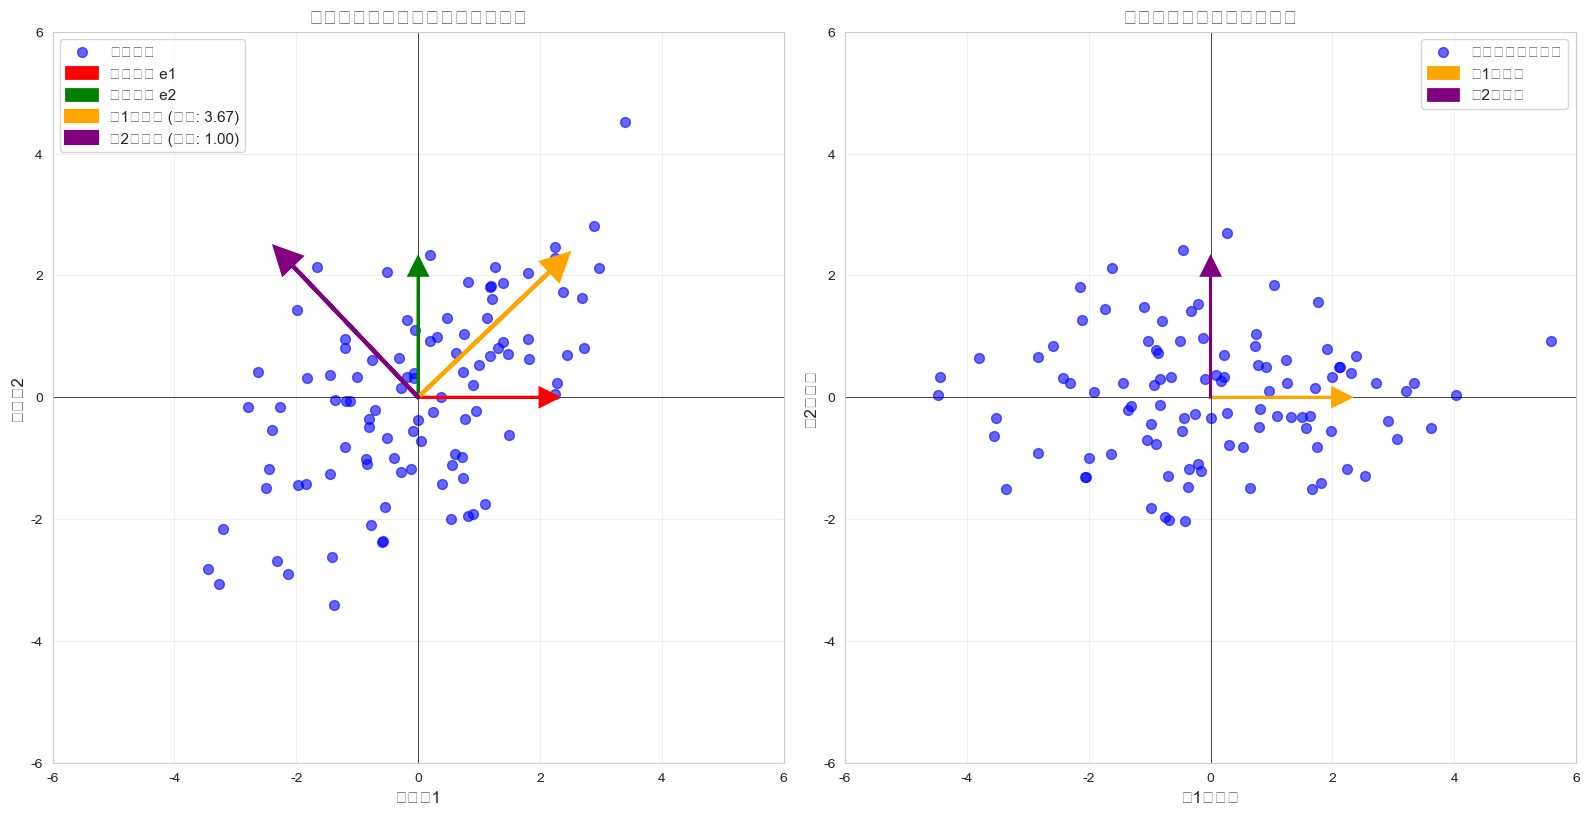


基底変換の効果:
元のデータの分散（特徴量1）: 2.37
元のデータの分散（特徴量2）: 2.25

主成分基底での分散（第1主成分）: 3.63
主成分基底での分散（第2主成分）: 0.99

→ 第1主成分の方が分散が大きく、より多くの情報を含んでいる


In [19]:
# PCAの可視化

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 左: 元のデータ（標準基底）
ax1 = axes[0]
ax1.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.6, s=50, c='blue', label='データ点')
# 標準基底
ax1.arrow(0, 0, 2, 0, head_width=0.3, head_length=0.3, fc='red', ec='red',
          linewidth=2, label='標準基底 e1', zorder=3)
ax1.arrow(0, 0, 0, 2, head_width=0.3, head_length=0.3, fc='green', ec='green',
          linewidth=2, label='標準基底 e2', zorder=3)
# 主成分（新しい基底）を重ねて表示
scale = 3
ax1.arrow(0, 0, scale * eigenvectors[0, 0], scale * eigenvectors[1, 0],
          head_width=0.4, head_length=0.4, fc='orange', ec='orange',
          linewidth=3, label=f'第1主成分 (分散: {eigenvalues[0]:.2f})', zorder=4)
ax1.arrow(0, 0, scale * eigenvectors[0, 1], scale * eigenvectors[1, 1],
          head_width=0.4, head_length=0.4, fc='purple', ec='purple',
          linewidth=3, label=f'第2主成分 (分散: {eigenvalues[1]:.2f})', zorder=4)

ax1.grid(True, alpha=0.3)
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)
ax1.set_aspect('equal')
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.legend(fontsize=11)
ax1.set_title('元のデータ（標準基底）と主成分', fontsize=14, fontweight='bold')
ax1.set_xlabel('特徴量1', fontsize=12)
ax1.set_ylabel('特徴量2', fontsize=12)

# 右: 主成分基底でのデータ
ax2 = axes[1]
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=50, c='blue', label='変換後のデータ点')
# 主成分基底
ax2.arrow(0, 0, 2, 0, head_width=0.3, head_length=0.3, fc='orange', ec='orange',
          linewidth=2, label='第1主成分', zorder=3)
ax2.arrow(0, 0, 0, 2, head_width=0.3, head_length=0.3, fc='purple', ec='purple',
          linewidth=2, label='第2主成分', zorder=3)

ax2.grid(True, alpha=0.3)
ax2.set_xlim(-6, 6)
ax2.set_ylim(-6, 6)
ax2.set_aspect('equal')
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.legend(fontsize=11)
ax2.set_title('主成分基底でのデータ表現', fontsize=14, fontweight='bold')
ax2.set_xlabel('第1主成分', fontsize=12)
ax2.set_ylabel('第2主成分', fontsize=12)

plt.tight_layout()
plt.show()

print("\n基底変換の効果:")
print(f"元のデータの分散（特徴量1）: {np.var(X_centered[:, 0]):.2f}")
print(f"元のデータの分散（特徴量2）: {np.var(X_centered[:, 1]):.2f}")
print(f"\n主成分基底での分散（第1主成分）: {np.var(X_pca[:, 0]):.2f}")
print(f"主成分基底での分散（第2主成分）: {np.var(X_pca[:, 1]):.2f}")
print(f"\n→ 第1主成分の方が分散が大きく、より多くの情報を含んでいる")


---

## 実装例

### 基底変換の実用的な関数


In [20]:
class BasisTransformer:
    """基底変換を行うクラス"""

    def __init__(self, basis):
        """
        Parameters:
        -----------
        basis : array-like, shape (n, n)
            基底ベクトル（各行が基底ベクトル）
        """
        self.basis = np.array(basis)
        self.n = self.basis.shape[0]

        # 基底が線形独立か確認
        if np.linalg.matrix_rank(self.basis) != self.n:
            raise ValueError("基底ベクトルは線形独立である必要があります")

        # 基底変換行列（この基底から標準基底への変換）
        self.P = self.basis.T

    def to_standard(self, coords):
        """
        この基底での座標を標準基底での座標に変換

        Parameters:
        -----------
        coords : array-like
            この基底での座標

        Returns:
        --------
        standard_coords : array
            標準基底での座標
        """
        return self.P @ np.array(coords)

    def from_standard(self, standard_coords):
        """
        標準基底での座標をこの基底での座標に変換

        Parameters:
        -----------
        standard_coords : array-like
            標準基底での座標

        Returns:
        --------
        coords : array
            この基底での座標
        """
        return np.linalg.inv(self.P) @ np.array(standard_coords)

    def transform_basis(self, other_basis):
        """
        別の基底への変換行列を計算

        Parameters:
        -----------
        other_basis : array-like
            別の基底

        Returns:
        --------
        transform_matrix : array
            この基底から別の基底への変換行列
        """
        other = BasisTransformer(other_basis)
        # この基底 → 標準基底 → 別の基底
        return np.linalg.inv(other.P) @ self.P

# 使用例
print("基底変換クラスの使用例:")
print("=" * 50)

# 標準基底
standard = BasisTransformer(np.eye(2))

# 45度回転した基底
theta = np.pi / 4
rotated_basis = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
rotated = BasisTransformer(rotated_basis)

# ベクトル（標準基底での座標）
v_std = np.array([3, 4])
print(f"標準基底での座標: {v_std}")

# 回転基底での座標に変換
v_rot = rotated.from_standard(v_std)
print(f"回転基底での座標: {v_rot}")

# 元に戻す
v_back = rotated.to_standard(v_rot)
print(f"標準基底に戻した座標: {v_back}")
print(f"誤差: {np.linalg.norm(v_std - v_back)}")


基底変換クラスの使用例:
標準基底での座標: [3 4]
回転基底での座標: [-0.70710678  4.94974747]
標準基底に戻した座標: [3. 4.]
誤差: 0.0


---

## まとめ

### 重要なポイント

1. **基底（Basis）**: ベクトル空間を構成する最小限の線形独立なベクトルの集合
2. **基底変換（Basis Change）**: 同じベクトルを異なる基底で表現し直す操作
3. **「データの見る角度を変える」**: 基底変換は、データをより扱いやすい形（座標系）で見直すための手法
4. **PCAへの応用**: 主成分分析は、データの重要な特徴を捉える新しい基底を見つける基底変換の応用

### 機械学習での重要性

- **特徴抽出**: データの本質的な特徴を捉える基底を見つける
- **次元削減**: 重要な基底だけを選んで、データの次元を減らす
- **可視化**: データをより見やすい方向から観察する
- **ノイズ除去**: 重要な方向（基底）だけを残して、ノイズを除去

### 次のステップ

第10章の主成分分析（PCA）では、この基底変換の概念を使って、データの重要な特徴だけを取り出す次元削減を学びます。
